In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = 'March')
data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = 'March')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [4]:
#zipcodes = gpd.read_file('/Users/VarshiniSelvadurai/Documents/Internship/mczipcodes.shp')
zipcodes = gpd.read_file('C:\\Users\\vns8\\Documents\\mczipcodes\\mczipcodes.shp')

# Blue Map --> Montgomery County by Zipcode
# Chloropleth Map --> Number of Crime Incidents per Zipcode (Mar 12 - 25)

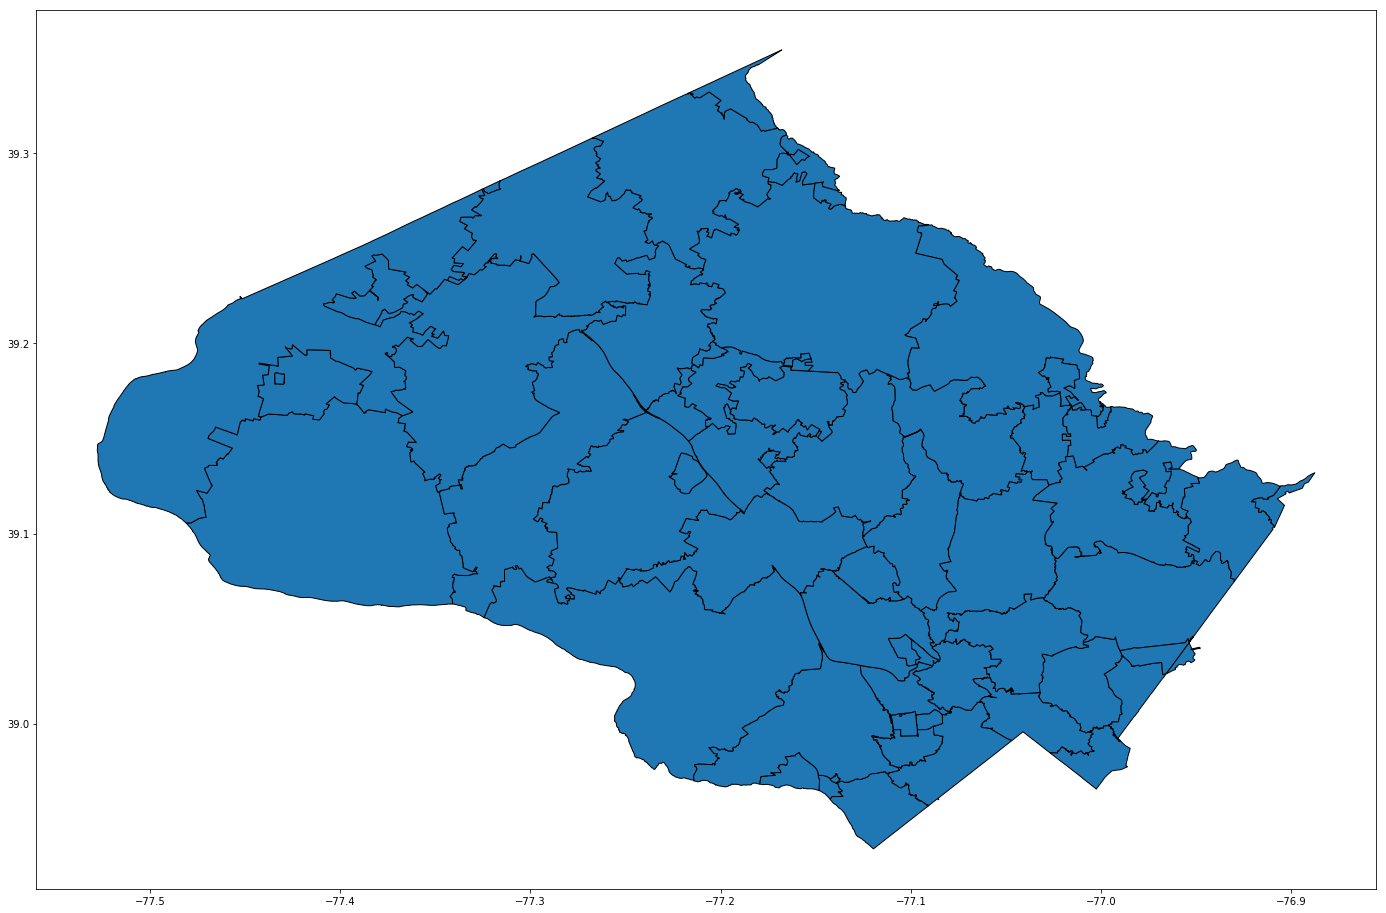

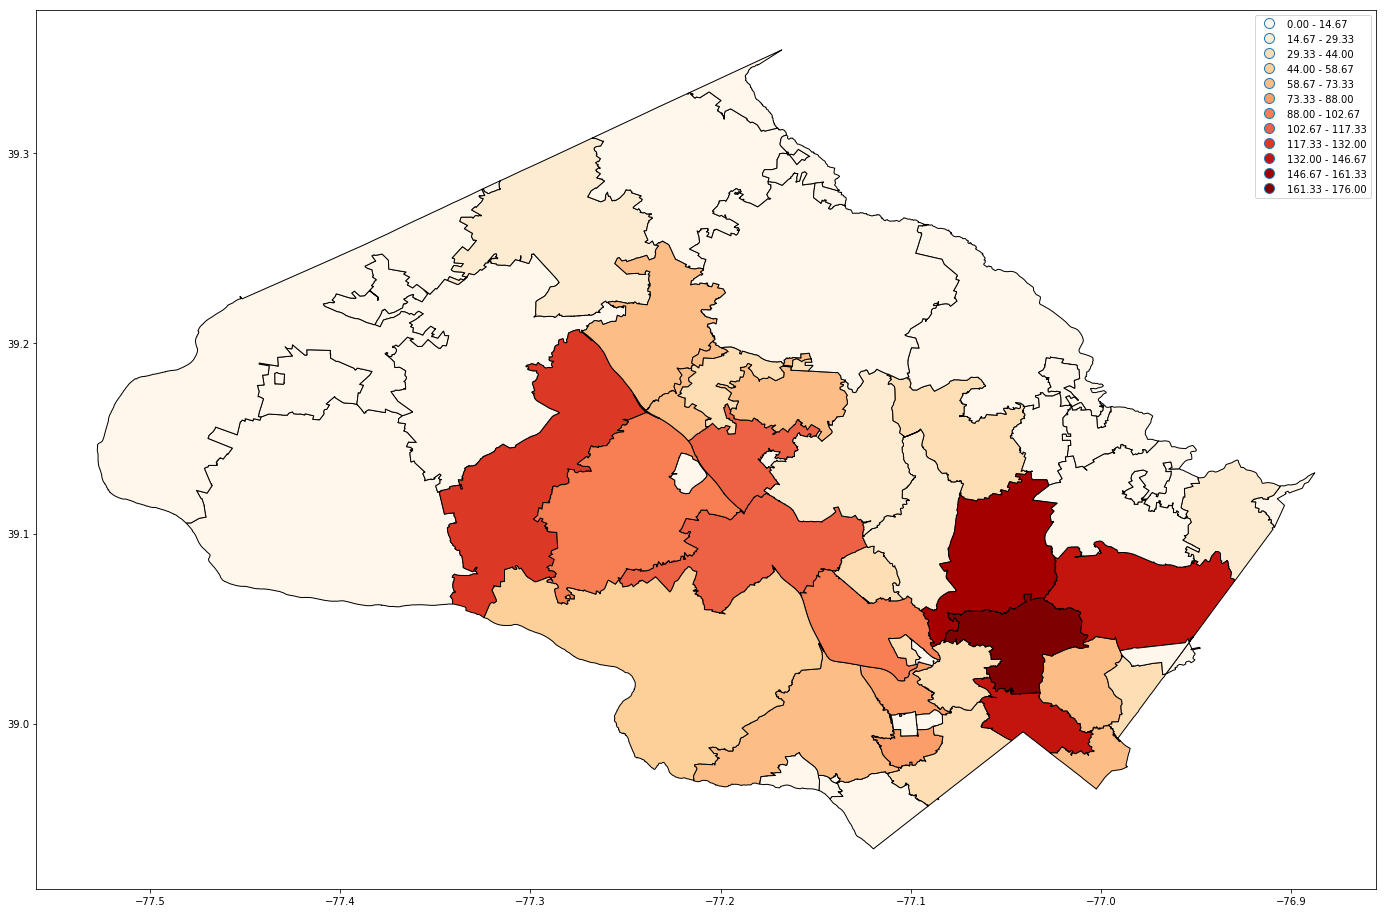

In [5]:
unique_zip = data['Zip Code'].nunique()
zipvalues = list(map(int, data['Zip Code'].value_counts().keys().tolist()))
zipcounts = list(map(int, data['Zip Code'].value_counts().tolist()))
ugh = []
zipcodes = zipcodes.sort_values('zipcode')
for z in zipcodes["zipcode"]:
    try:
        ugh.append(zipcounts[zipvalues.index(z)])
    except:
        ugh.append(0)
zipcodes['crime'] = ugh
uzip = zipcodes.drop_duplicates("zipcode")
zipcodes.plot(figsize = (24,48),edgecolor = 'black')
zipcodes.plot(column = 'crime', cmap = "OrRd", scheme = 'equal_interval', k = 12, legend = True,figsize = (24,48),edgecolor = 'black')

# Chloropleth Annotated with Zipcode & Crime

92    Annotation(-76.9532,39.0438,'20705.0')
43     Annotation(-76.907,39.1173,'20707.0')
57    Annotation(-76.9987,39.1616,'20777.0')
93    Annotation(-76.9565,39.0346,'20783.0')
0     Annotation(-77.1429,38.9666,'20812.0')
24    Annotation(-77.1052,39.0169,'20814.0')
21    Annotation(-77.0784,38.9838,'20815.0')
1     Annotation(-77.1181,38.9565,'20816.0')
27    Annotation(-77.1522,38.9962,'20817.0')
2     Annotation(-77.1611,38.9731,'20818.0')
62    Annotation(-77.0732,39.1511,'20832.0')
76    Annotation(-77.0569,39.2037,'20833.0')
58    Annotation(-77.4061,39.1117,'20837.0')
73    Annotation(-77.3798,39.2258,'20838.0')
70    Annotation(-77.4162,39.1785,'20839.0')
74    Annotation(-77.3265,39.1883,'20841.0')
63    Annotation(-77.4319,39.1814,'20842.0')
40    Annotation(-77.1811,39.0909,'20850.0')
38    Annotation(-77.1216,39.0781,'20851.0')
34    Annotation(-77.1415,39.0805,'20852.0')
52    Annotation(-77.0949,39.1022,'20853.0')
37    Annotation(-77.2235,39.0358,'20854.0')
64    Anno

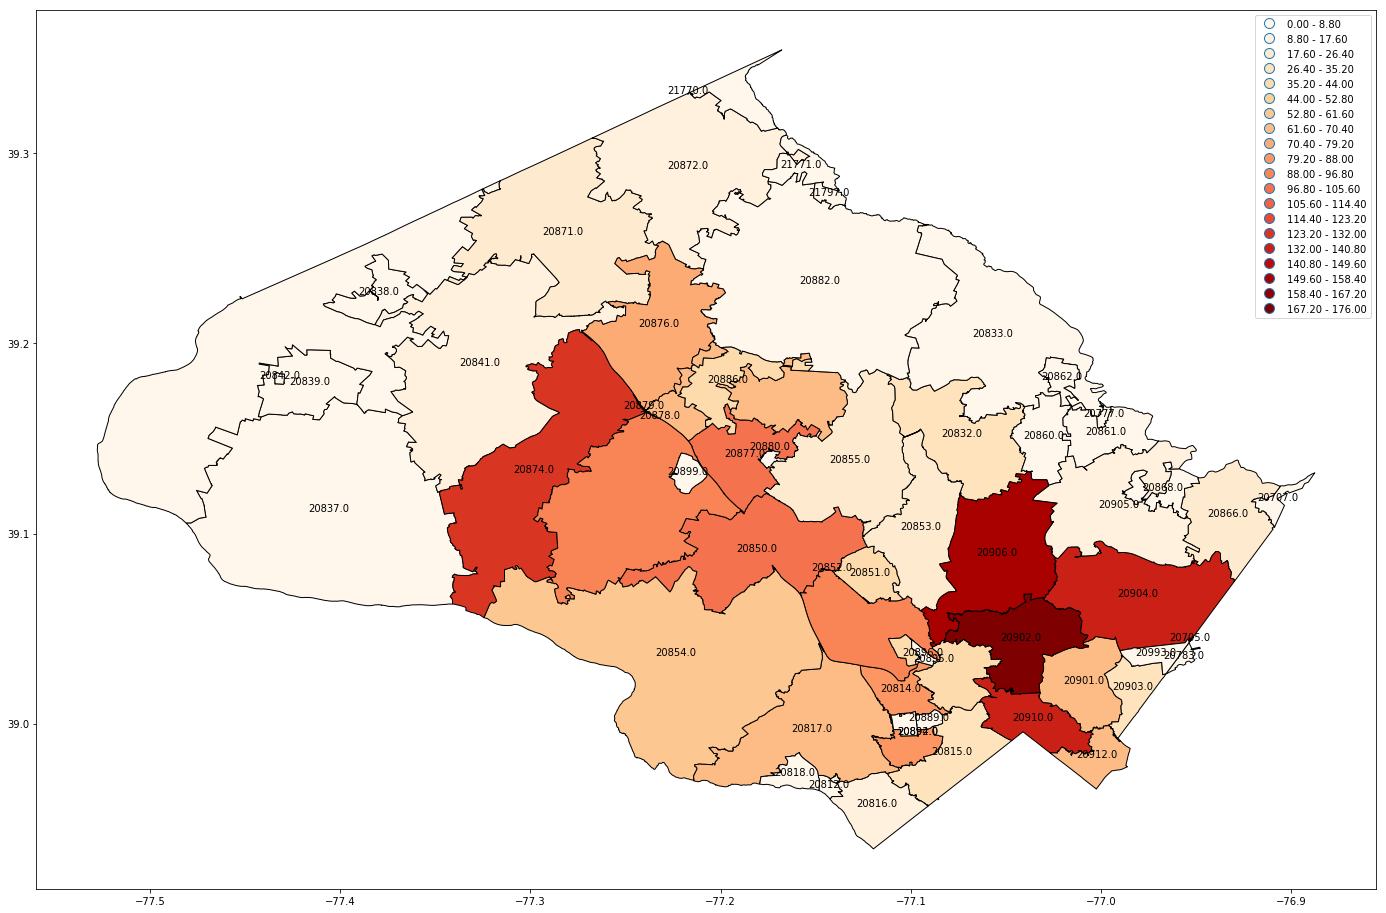

In [6]:
forzip = uzip
ay = zipcodes.plot(column = 'crime', cmap = "OrRd", scheme = 'equal_interval', k = 20, legend = True,figsize = (24,48),edgecolor = 'black')
forzip.apply(lambda x: ay.annotate(s=x.zipcode, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

# Zipcodes ranked by number of crimes

92      Annotation(-76.9532,39.0438,'0')
43       Annotation(-76.907,39.1173,'0')
57      Annotation(-76.9987,39.1616,'0')
93      Annotation(-76.9565,39.0346,'1')
0       Annotation(-77.1429,38.9666,'0')
24     Annotation(-77.1052,39.0169,'84')
21     Annotation(-77.0784,38.9838,'30')
1      Annotation(-77.1181,38.9565,'12')
27     Annotation(-77.1522,38.9962,'62')
2       Annotation(-77.1611,38.9731,'1')
62     Annotation(-77.0732,39.1511,'32')
76      Annotation(-77.0569,39.2037,'2')
58      Annotation(-77.4061,39.1117,'4')
73      Annotation(-77.3798,39.2258,'1')
70      Annotation(-77.4162,39.1785,'0')
74     Annotation(-77.3265,39.1883,'10')
63      Annotation(-77.4319,39.1814,'4')
40    Annotation(-77.1811,39.0909,'105')
38     Annotation(-77.1216,39.0781,'36')
34     Annotation(-77.1415,39.0805,'93')
52     Annotation(-77.0949,39.1022,'25')
37     Annotation(-77.2235,39.0358,'54')
64     Annotation(-77.1323,39.1377,'18')
61        Annotation(-77.0301,39.15,'0')
55      Annotati

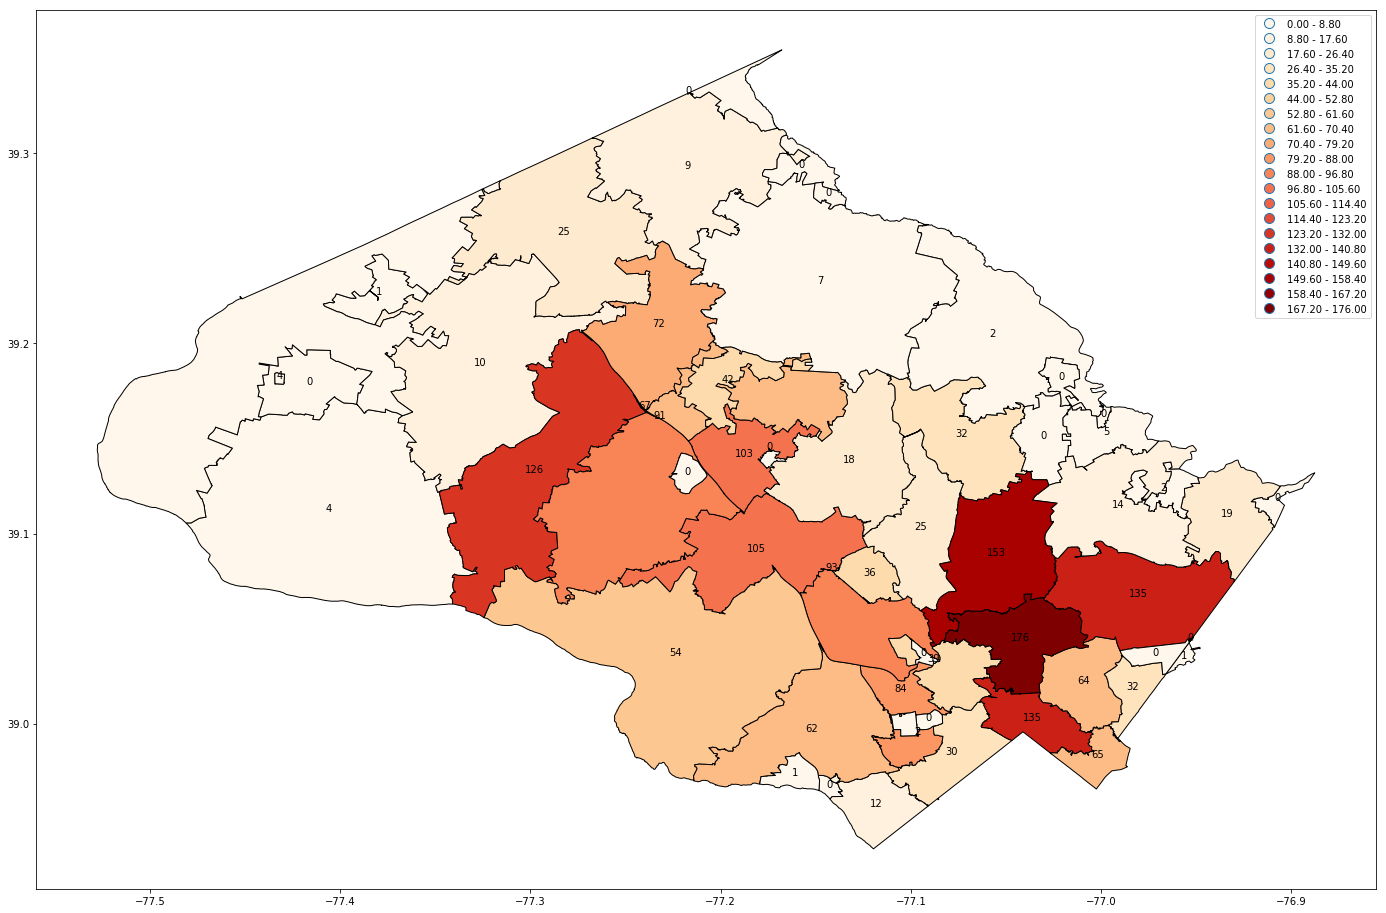

In [7]:
forcrime = uzip
ay = zipcodes.plot(column = 'crime', cmap = "OrRd", scheme = 'equal_interval', k = 20, legend = True,figsize = (24,48),edgecolor = 'black')
forcrime.apply(lambda x: ay.annotate(s=x.crime, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

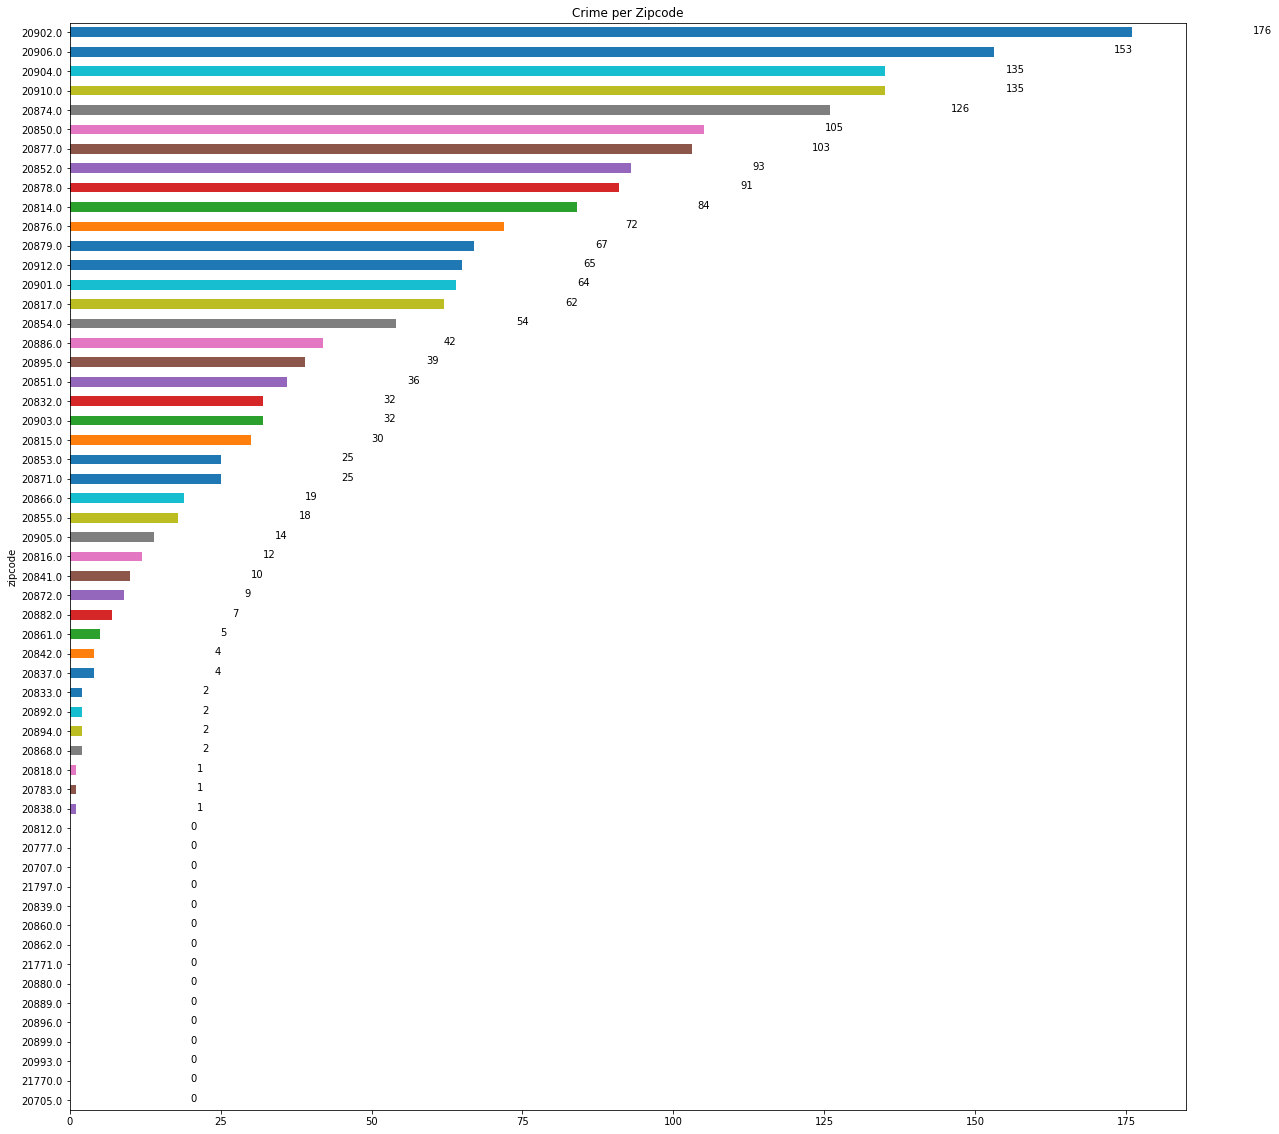

In [9]:
bar = (pd.DataFrame(uzip)).sort_values(['crime'])
ax = bar.plot(x = 'zipcode', y = 'crime', kind = 'barh', figsize = (20,20),title = 'Crime per Zipcode', legend = False)
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+20, i.get_y()+.19,str(i.get_width()))
